In [1]:
import textstat
import itables
import os
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from scr.scraper.scraper import scrape_article_content, scrape_yale_health_links
from scr.translator.ai_translator import rewrite_article_for_5th_graders

In [24]:
# standard list of links for now
article_links = [
    "https://medicine.yale.edu/news-article/study-reveals-how-calcium-channel-mutations-lead-to-cognitive-dysfunction/",
    'https://medicine.yale.edu/internal-medicine/news-article/artificial-intelligence-medical-education-research-patient-care/', 
    'https://medicine.yale.edu/internal-medicine/news-article/improving-health-outcomes-through-community-outreach/', 
    'https://medicine.yale.edu/internal-medicine/news-article/polycystic-kidney-disease-treatment-gene-target-identified/', 
    'https://medicine.yale.edu/news-article/in-situ-microscopy-gives-atomic-level-view-in-native-mitochondria/',
    'https://medicine.yale.edu/internal-medicine/news-article/artificial-intelligence-medical-education-research-patient-care/',
    'https://medicine.yale.edu/psychiatry/news-article/first-us-trial-of-varenicline-for-e-cigarette-cessation-shows-positive-results/',
    'https://medicine.yale.edu/news-article/stem-cell-research-uncovers-clues-to-tissue-repair-that-could-help-heal-the-uterus-and-more/',
    'https://medicine.yale.edu/ortho/news-article/yale-orthopaedics-chair-performs-first-in-house-3d-surgical-case/',
    'https://medicine.yale.edu/internal-medicine/news-article/investigating-the-link-between-metabolism-and-cancer/',
    'https://medicine.yale.edu/ycci/news-article/a-new-kind-of-clinical-trial-bringing-long-covid-research-into-patients-homes/',
    'https://medicine.yale.edu/internal-medicine/news-article/yale-experts-benefits-of-exercise/',
    'https://medicine.yale.edu/news-article/students-and-faculty-mentors-celebrated-at-student-research-day/',
    'https://medicine.yale.edu/internal-medicine/news-article/investigating-the-link-between-metabolism-and-cancer/',
    'https://medicine.yale.edu/news-article/what-is-your-word-for-change-a-global-call-to-youth-to-inspire-a-new-humanism-for-a-brighter-future/',
    'https://medicine.yale.edu/psychiatry/news-article/first-us-trial-of-varenicline-for-e-cigarette-cessation-shows-positive-results/',
    'https://medicine.yale.edu/news-article/search-affordable-treatment-option-liver-disease/',
    'https://medicine.yale.edu/internal-medicine/news-article/five-reasons-to-see-a-pulmonologist/',
    'https://medicine.yale.edu/news-article/filling-a-gap-in-training-medical-students-to-care-for-transgender-and-gender-diverse-patients/',
    'https://medicine.yale.edu/news-article/celebrating-health-profession-students-poetry-prose-and-visual-arts/',
    'https://medicine.yale.edu/internal-medicine/news-article/investigating-the-link-between-metabolism-and-cancer/',
    'https://medicine.yale.edu/news-article/covid-19-new-omics-models-show-why-some-people-are-at-greater-risk-of-severe-disease-death/',
    'https://medicine.yale.edu/news-article/in-the-early-steps-of-cancer-formation-timing-matters/',
    'https://medicine.yale.edu/news-article/a-better-covid-treatment-for-the-immunocompromised/',
    'https://medicine.yale.edu/internal-medicine/news-article/curbing-the-price-of-novel-diabetes-and-obesity-medications/'
]

In [25]:
# Collect the data
data = []
for link in article_links:
    article_data = scrape_article_content(link)
    data.append(article_data)

# Create the DataFrame
df = pd.DataFrame(data).drop(columns=['raw_html'])

In [37]:
# get readability scores for the dataframe
scores_df = df[['title']].copy()

scores_df['SMOG'] = df['text'].apply(textstat.smog_index)
scores_df['Flesch-Kincaid Reading Ease'] = df['text'].apply(textstat.flesch_reading_ease)
scores_df['Flesch-Kincaid Grade Level'] = df['text'].apply(textstat.flesch_kincaid_grade)
scores_df['Gunning Fog'] = df['text'].apply(textstat.gunning_fog)


itables.show(scores_df)

# Translated text

In [2]:
# ensure that the Anthropic API key exists on the system
if not os.getenv('ANTHROPIC_API_KEY'):
    api_key = getpass.getpass('ANTHROPIC_API_KEY not found. Please enter your API key: ')
    os.environ['ANTHROPIC_API_KEY'] = api_key

In [6]:
translated_df = df[['title']].copy()
translated_df['5th_grade_text'] = df['text'].apply(rewrite_article_for_5th_graders)

itables.show(translated_df)

In [7]:
translated_df.to_csv("5th_grade_reading.csv")

In [9]:
translated_df = pd.read_csv("5th_grade_reading.csv")

In [38]:
fifth_grade_scores_df = translated_df[['title']].copy()

fifth_grade_scores_df['SMOG'] = translated_df['5th_grade_text'].apply(textstat.smog_index)
fifth_grade_scores_df['Flesch-Kincaid Reading Ease'] = translated_df['5th_grade_text'].apply(textstat.flesch_reading_ease)
fifth_grade_scores_df['Flesch-Kincaid Grade Level'] = translated_df['5th_grade_text'].apply(textstat.flesch_kincaid_grade)
fifth_grade_scores_df['Gunning Fog'] = translated_df['5th_grade_text'].apply(textstat.gunning_fog)

itables.show(fifth_grade_scores_df)

In [33]:
itables.show(scores_df)

# Data Analysis

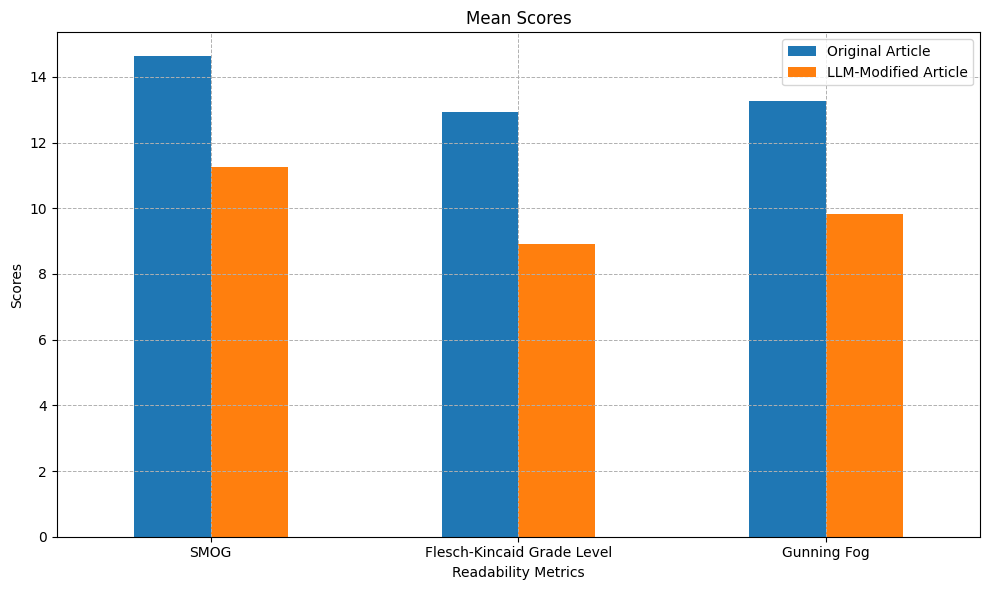

In [12]:
# Metrics plot
mean_og_scores = scores_df.copy().drop(columns=['title', 'Flesch-Kincaid Reading Ease']).mean()
mean_translated_scores = fifth_grade_scores_df.copy().drop(columns=['title', 'Flesch-Kincaid Reading Ease']).mean()

data = {
    'Readability Metric': ['SMOG', 'Flesch-Kincaid Grade Level', 'Gunning Fog'],
    'Original Article': mean_og_scores,
    'LLM-Modified Article': mean_translated_scores
}

metrics_plot_one = pd.DataFrame(data)

metrics_plot_one.set_index('Readability Metric', inplace=True)

ax = metrics_plot_one.plot(kind='bar', figsize=(10, 6))

plt.title('Mean Scores')
plt.xlabel('Readability Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

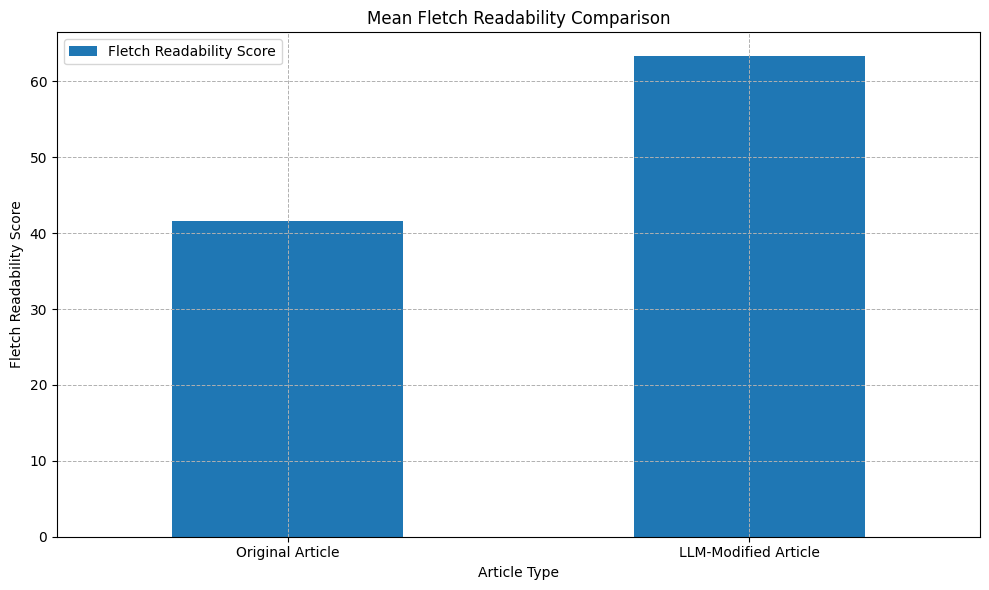

In [39]:
flech_reading_og = scores_df['Flesch-Kincaid Reading Ease'].copy().mean()
flech_reading_translated = fifth_grade_scores_df['Flesch-Kincaid Reading Ease'].copy().mean()

metrics_plot_two = pd.DataFrame({
    'Article Type': ['Original Article', 'LLM-Modified Article'],
    'Fletch Readability Score': [flech_reading_og, flech_reading_translated]
})

ax = metrics_plot_two.plot(kind='bar', x='Article Type', y='Fletch Readability Score', figsize=(10, 6))

plt.title('Mean Fletch Readability Comparison')
plt.xlabel('Article Type')
plt.ylabel('Fletch Readability Score')
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [42]:
computable_og_scores = scores_df.copy().drop(columns=['title'])
computable_translated_scores = fifth_grade_scores_df.copy().drop(columns=['title'])

delta_df = computable_translated_scores - computable_og_scores

delta_df.mean()

SMOG                           -3.3640
Flesch-Kincaid Reading Ease    21.6404
Flesch-Kincaid Grade Level     -4.0120
Gunning Fog                    -3.4332
dtype: float64